## Malicious URL detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url_data=pd.read_csv('shorted_malicios_dataset.csv')

In [ ]:
url_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


Text(0.5, 1.0, 'Count of BAD and GOOD')

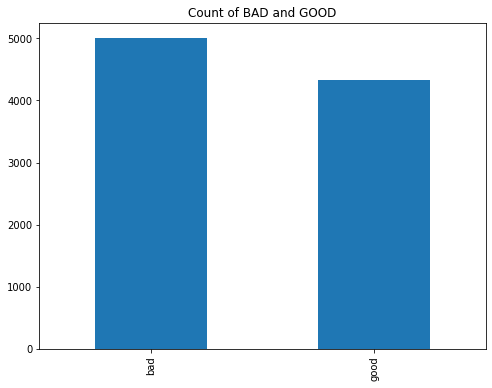

In [ ]:
plt.figure(figsize=(8,6))
url_data['label'].value_counts().sort_index().plot.bar()
plt.title("Count of BAD and GOOD")

## Data Preprocessing

In [ ]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/') # make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-') # make tokens after splitting by dash
        tkns_ByDot = []
    for j in range(0,len(tokens)):
        temp_Tokens = str(tokens[j]).split('.') # make tokens after splitting by dot
        tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
        total_Tokens = list(set(total_Tokens))  #remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com') # removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
url_data['label']= label_encoder.fit_transform(url_data['label'])

In [ ]:
url_data

,url,label
0,diaryofagameaddict.com,0
1,espdesign.com.au,0
2,iamagameaddict.com,0
3,kalantzis.net,0
4,slightlyoffcenter.net,0
...,...,...
9317,answers.yahoo.com/question/index?qid=200907081...,1
9318,answers.yahoo.com/question/index?qid=200907121...,1
9319,answers.yahoo.com/question/index?qid=200907171...,1
9320,answers.yahoo.com/question/index?qid=200907180...,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
url_list = url_data["url"]
y = url_data["label"]

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [ ]:
X = vectorizer.fit_transform(url_list)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Model Building
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(X_train, y_train)

LogisticRegression()

### Evaluation

In [ ]:
y_pred = logit.predict(X_test)

In [ ]:
print("Training Accuracy:",logit.score(X_train, y_train))
print("Testing Accuracy :",logit.score(X_test, y_test))

Training Accuracy: 0.8786375217916053
Testing Accuracy : 0.7764075067024129


In [ ]:
X_predict = ['yahoo.fr','www.radsport-voggel.de/wp-admin/includes/log.exe','hello.ru','ipl.hk','f**k.buk','kalantzis.net']
X_predict = vectorizer.transform(X_predict)
y_Predict = logit.predict(X_predict)
print(y_Predict)

[1 0 0 0 1 0]


In [ ]:
class logreg() :
    def __init__( self, learning_rate,iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations

    def fit( self, X, Y ) :     
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
        return self

    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

### SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier_SVC = SVC(kernel='linear', random_state=0)  
classifier_SVC.fit(X_train, y_train)  
print("Training Accuracy:",classifier_SVC.score(X_train, y_train))
print("Testing Accuracy :",classifier_SVC.score(X_test, y_test))

Training Accuracy: 0.8850744267131554
Testing Accuracy : 0.781769436997319


In [ ]:
print("Training Accuracy:",classifier_SVC.score(X_train, y_train))
print("Testing Accuracy :",classifier_SVC.score(X_test, y_test))

Training Accuracy: 0.8850744267131554
Testing Accuracy : 0.781769436997319


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier_KNN= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier_KNN.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Training Accuracy:",classifier_KNN.score(X_train, y_train))
print("Testing Accuracy :",classifier_KNN.score(X_test, y_test))

Training Accuracy: 0.6957221402708864
Testing Accuracy : 0.6729222520107239


In [ ]:
import os,sys
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix



df = pd.read_csv('shorted_malicios_dataset.csv')

df.head()


x = df[['url']]  

y = df[['label']]      

y = np.where(y == "bad", 0, 1)
le = LabelEncoder()
X = le.fit_transform(x)
X = X.reshape(-1,1)
#y = pd.map({'good':1,'bad':0})  



x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)


dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)


print(y_pred[0:5]) 


a = accuracy_score(y_test,y_pred)*100

print("Test set accuracy :{:.2f}".format(a))


c =  confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ",c)

[1 0 0 1 1]
Test set accuracy :95.66
Confusion Matrix:  [[940  72]
 [  9 844]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
